Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#경로 설정
import os
os.chdir('/content/drive/My Drive/')

## Exercise 3: Classification

### 3.1. Should we play golf?
The Golf data set models different aspects of the weather (outlook, temperature, humidity, forecast) that are relevant for deciding whether one should play golf or not.

In [3]:
# import the pandas package
import pandas as pd

# load golf.csv
golf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KNN+DecisionTree/golf.csv')

# look at the first few records to see that it worked
golf.head()

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,no
1,sunny,80.0,90.0,True,no
2,overcast,83.0,78.0,False,yes
3,rain,70.0,96.0,False,yes
4,rain,68.0,80.0,False,yes


#### 3.1.1 Learn a decision tree model from the Golf data set. Use this model to classify the examples in the Golf-Testset. 

- Think about ways how you can evaluate the performance of your model. 
- Which measures can be calculated from the resulting dataset?

In [4]:
from sklearn import preprocessing

golf_preprocessed = golf.copy()
# remove the target variable from the dataframe and encode it
golf_target = golf['Play']
golf_preprocessed = golf.drop(columns='Play')
label_encoder = preprocessing.LabelEncoder()
golf_target = label_encoder.fit_transform(golf_target)

# encode the categorical attributes 'Outlook' and 'Wind'
encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(golf_preprocessed[['Outlook', 'Wind']]).toarray(), columns=encoder.get_feature_names_out(['Outlook', 'Wind']))

golf_preprocessed = golf_preprocessed.drop(columns=['Outlook', 'Wind'])
golf_preprocessed = golf_preprocessed.join(encoded)
golf_preprocessed

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Wind_False,Wind_True
0,85.0,85.0,0.0,0.0,1.0,1.0,0.0
1,80.0,90.0,0.0,0.0,1.0,0.0,1.0
2,83.0,78.0,1.0,0.0,0.0,1.0,0.0
3,70.0,96.0,0.0,1.0,0.0,1.0,0.0
4,68.0,80.0,0.0,1.0,0.0,1.0,0.0
5,65.0,70.0,0.0,1.0,0.0,0.0,1.0
6,64.0,65.0,1.0,0.0,0.0,0.0,1.0
7,72.0,95.0,0.0,0.0,1.0,1.0,0.0
8,69.0,70.0,0.0,0.0,1.0,1.0,0.0
9,75.0,80.0,0.0,1.0,0.0,1.0,0.0


In [93]:
golf_target

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(golf_preprocessed, golf_target)

DecisionTreeClassifier()

In [6]:
%pip install -q -U graphviz

     |████████████████████████████████| 46 kB 2.6 MB/s 


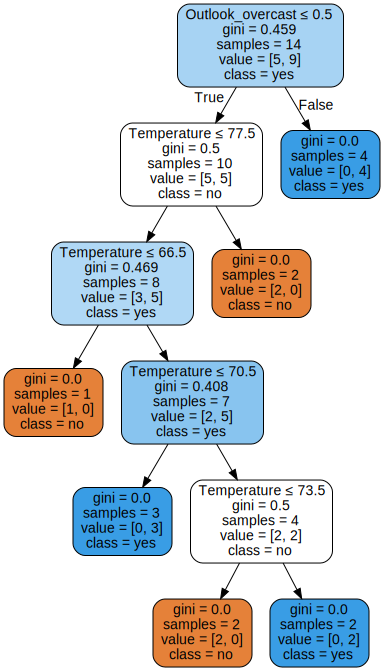

In [7]:
## Windows users: either add the path to graphviz' dot.exe to your PATH variable 
## OR comment in the 2 lines below (may have to change path):

# import os
# os.environ['PATH'] += ';C:\\Program Files (x86)\\Graphviz2.38\\bin'
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=golf_preprocessed.columns, 
                                class_names=label_encoder.classes_,
                               filled=True, rounded=True, special_characters=True) 
# learn a decision tree and visualise it
graph = graphviz.Source(dot_data) 

display(graph)

In [9]:
# load the test set and apply the same preprocessing as for the training set
golf_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KNN+DecisionTree/golf_testset.csv')
# create a variable with the values of the target variable
golf_target_test = golf_test['Play']
# and remove it from the dataframe so it only contains the features that our model should use
golf_test = golf_test.drop(columns='Play')
# encode the target variable into a numeric value
golf_target_test = label_encoder.transform(golf_target_test)

encoded = pd.DataFrame(encoder.transform(golf_test[['Outlook', 'Wind']]).toarray(), columns=encoder.get_feature_names_out(['Outlook', 'Wind']))
golf_test = golf_test.drop(columns=['Outlook', 'Wind'])

golf_test = golf_test.join(encoded)
golf_test.head()

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Wind_False,Wind_True
0,85.0,85.0,0.0,0.0,1.0,1.0,0.0
1,80.0,90.0,1.0,0.0,0.0,0.0,1.0
2,83.0,78.0,1.0,0.0,0.0,1.0,0.0
3,70.0,96.0,0.0,1.0,0.0,1.0,0.0
4,68.0,80.0,0.0,1.0,0.0,0.0,1.0


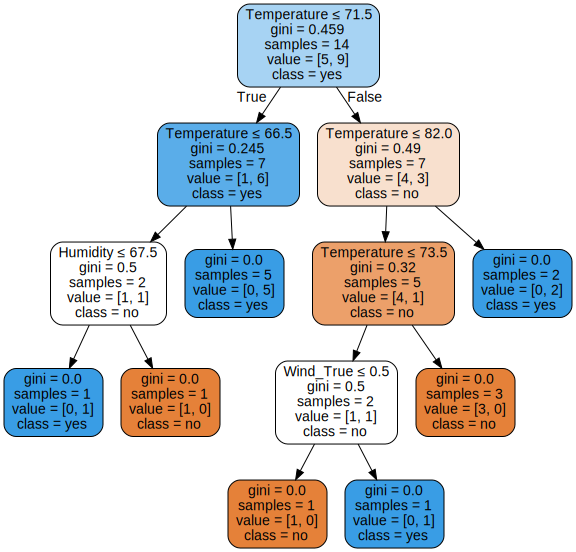

In [10]:
# apply the model and compare the predictions to the actual values of the target variable
dt.fit(golf_test, golf_target_test)
dot_data_test = tree.export_graphviz(dt, out_file=None, 
                                feature_names=golf_test.columns, 
                                class_names=label_encoder.classes_,
                               filled=True, rounded=True, special_characters=True) 
# learn a decision tree and visualise it
graph_test = graphviz.Source(dot_data_test) 

display(graph_test)

#### 3.1.2 Evaluate the performance of your model.
- by calling confusion_matrix and accuracy_score
- examine the confusion matrix. What is the accuracy of your classifier?

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [14]:
# calculate the accuracy of your classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

golf_prediction = label_encoder.transform(['yes','no','yes','yes','no','yes','yes','no','no','no','no','no','no','yes'])

display(golf_target)
display(golf_prediction)

print("Confusion Matrix:")
print(confusion_matrix(golf_target, golf_prediction))
print()

print("Accuracy: {}".format(accuracy_score(golf_target, golf_prediction)))

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

Confusion Matrix:
[[2 3]
 [6 3]]

Accuracy: 0.35714285714285715


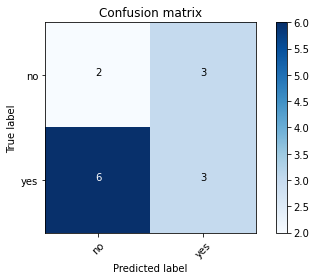

In [15]:
# create the confusion matrix and visualise it
cnf_matrix = confusion_matrix(golf_target, golf_prediction)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_)


Test set

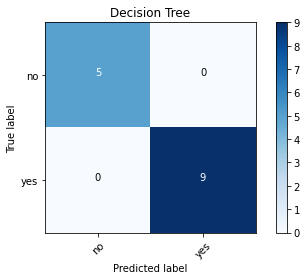

In [16]:
golf_prediction = dt.predict(golf_test)
cnf_matrix = confusion_matrix(golf_target_test, golf_prediction)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_, title='Decision Tree')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    golf, golf_target,test_size=0.2, random_state=42, stratify=golf_target)

print("=======TRAIN=========")
display(data_train)
display(target_train)

=======TRAIN=========


,Outlook,Temperature,Humidity,Wind,Play
1,sunny,80.0,90.0,True,no
6,overcast,64.0,65.0,True,yes
4,rain,68.0,80.0,False,yes
13,rain,71.0,80.0,True,no
3,rain,70.0,96.0,False,yes
2,overcast,83.0,78.0,False,yes
5,rain,65.0,70.0,True,no
12,overcast,81.0,75.0,False,yes
0,sunny,85.0,85.0,False,no
9,rain,75.0,80.0,False,yes


array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [18]:
print("=======TEST=========")
display(data_test)
display(target_test)

=======TEST=========


,Outlook,Temperature,Humidity,Wind,Play
7,sunny,72.0,95.0,False,no
11,overcast,72.0,90.0,True,yes
8,sunny,69.0,70.0,False,yes


array([0, 1, 1])

#### 3.1.3 Does a k-nearest-neighbor classifier work better for this task? 
- Check how the accuracy of your classifier changes to find out. 
- Do different values of k improve the performance?

In [19]:
# learn KNN classifiers for different values of K and compare their accuracy
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(golf_preprocessed, golf_target)

KNeighborsClassifier(n_neighbors=3)

In [20]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import math
def plot_decision_boundary(df, target, estimator):
    # create a list of all columns that we are considering
    features = df.columns

    # create all combinations of considered columns
    combinations = list(itertools.combinations(features, 2))

    # create a figure and specify its size
    fig = plt.figure(figsize=(15,20))

    # go through all combinations and create one plot for each
    figure_index = 1
    plot_step = 0.02
    cols = 3
    rows =  math.ceil(len(combinations) / cols)
    for combination in combinations:
        # Plot the decision boundary
        plt.subplot(rows, cols, figure_index)
        figure_index += 1

        x_min, x_max = df[combination[0]].min() - 1, df[combination[0]].max() + 1
        y_min, y_max = df[combination[1]].min() - 1, df[combination[1]].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        estimator.fit(df[[combination[0], combination[1]]].values, target)
        Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdYlBu, shading='auto')

        plt.xlabel(combination[0])
        plt.ylabel(combination[1])
        
        for cls in set(target):
            group = df[ target == cls ]
            # plot the data points for the current group and feature combination
            plt.scatter(group[combination[0]], group[combination[1]], label=cls, edgecolor='black')

### Decision Boundaries for the 3 Nearest-Neighbours Classifier

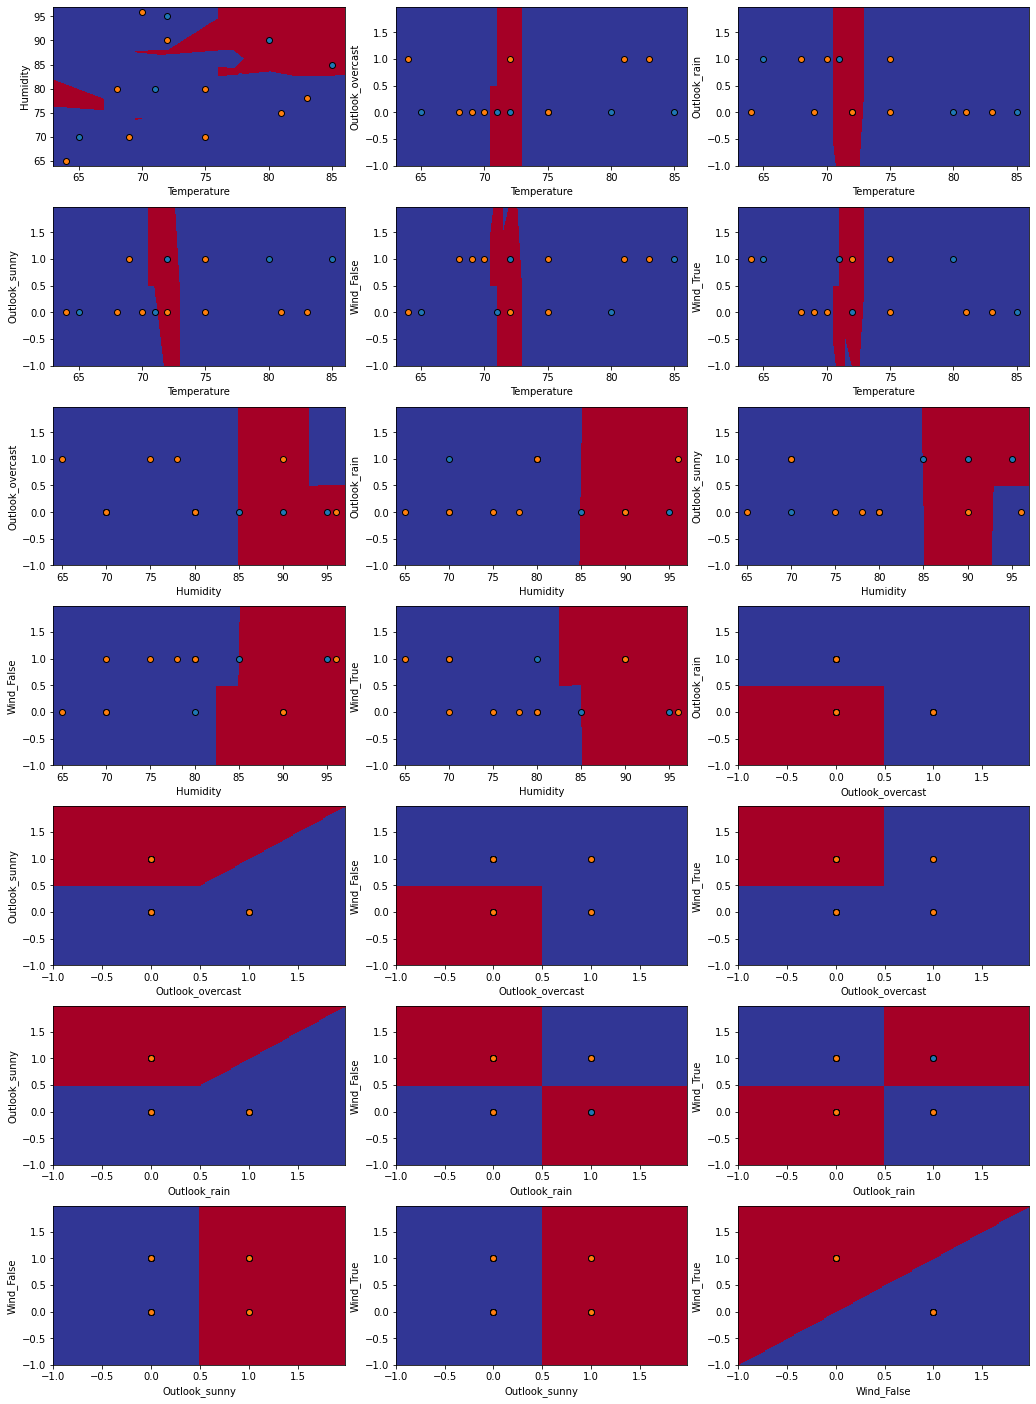

In [21]:
plot_decision_boundary(golf_preprocessed, golf_target, KNeighborsClassifier(3))

### Decision Boundaries for the Decision Tree Classifier

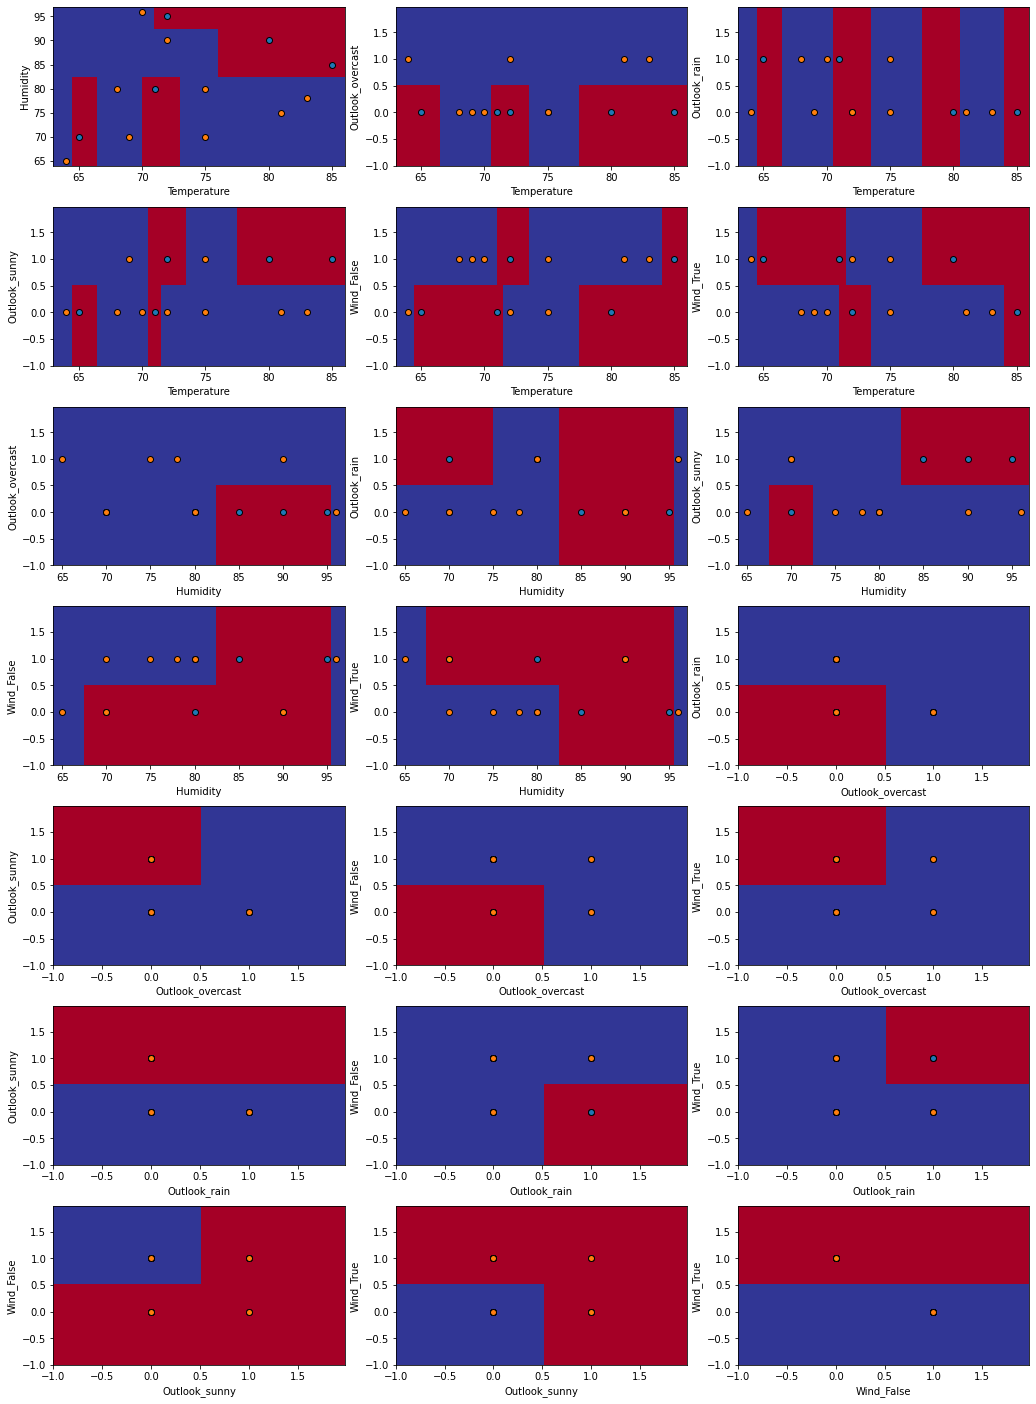

In [22]:
plot_decision_boundary(golf_preprocessed, golf_target, DecisionTreeClassifier())

### 3.2. Learning a classifier for the Iris Data Set
You want to learn and evaluate a classifier for recognizing different types of Iris flowers.

#### 3.2.1 Let’s try the decision tree classifier first. 
Create a train/test split (with function train_test_split) with 30% test size and stratified sampling.  Evaluate the accuracy of the learned model.

In [34]:
# load the iris dataset
iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KNN+DecisionTree/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
# create a variable with the values of the target variable
iris_target = iris['Name']

# and remove it from the dataframe so it only contains the features that our model should use
iris_preprocessed = iris.drop(columns='Name')

# encode the target variable into a numeric value
label_encoder = preprocessing.LabelEncoder()
iris_target = label_encoder.fit_transform(iris_target)

# encode the Name features
#encoder = preprocessing.OneHotEncoder()
#encoded = pd.DataFrame(encoder.fit_transform(iris_preprocessed[['Name']]).toarray(), columns=encoder.get_feature_names_out(['Name']))

#golf_preprocessed = golf_preprocessed.drop(columns=['Outlook', 'Wind'])
#golf_preprocessed = golf_preprocessed.join(encoded)

iris_preprocessed

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
# create a train/test split
data_train, data_test, target_train, target_test = train_test_split(
    iris_preprocessed, iris_target,test_size=0.3, random_state=42, stratify=iris_target)

print("=======TRAIN=========")
display(data_train)
display(target_train)

=======TRAIN=========


,SepalLength,SepalWidth,PetalLength,PetalWidth
98,5.1,2.5,3.0,1.1
68,6.2,2.2,4.5,1.5
19,5.1,3.8,1.5,0.3
143,6.8,3.2,5.9,2.3
99,5.7,2.8,4.1,1.3
...,...,...,...,...
37,4.9,3.1,1.5,0.1
79,5.7,2.6,3.5,1.0
33,5.5,4.2,1.4,0.2
94,5.6,2.7,4.2,1.3


array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

In [39]:
print("=======TEST=========")
display(data_test)
display(target_test)

=======TEST=========


,SepalLength,SepalWidth,PetalLength,PetalWidth
107,7.3,2.9,6.3,1.8
63,6.1,2.9,4.7,1.4
133,6.3,2.8,5.1,1.5
56,6.3,3.3,4.7,1.6
127,6.1,3.0,4.9,1.8
140,6.7,3.1,5.6,2.4
53,5.5,2.3,4.0,1.3
69,5.6,2.5,3.9,1.1
20,5.4,3.4,1.7,0.2
141,6.9,3.1,5.1,2.3


array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1])

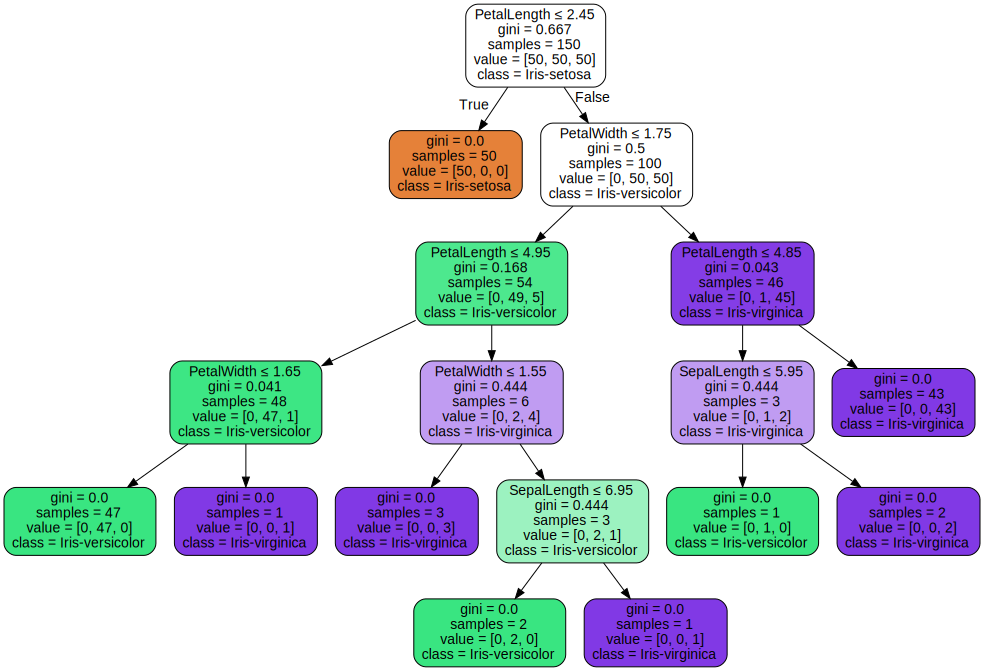

In [49]:
# learn a decision tree
dt.fit(iris_preprocessed, iris_target)
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=iris_preprocessed.columns, 
                                class_names=label_encoder.classes_,
                               filled=True, rounded=True, special_characters=True) 

graph = graphviz.Source(dot_data) 

display(graph)

In [53]:
iris_prediction = label_encoder.transform(['Iris-versicolor','Iris-virginica','Iris-setosa','Iris-versicolor','Iris-virginica','Iris-setosa','Iris-versicolor','Iris-setosa','Iris-virginica','Iris-setosa','Iris-versicolor','Iris-setosa','Iris-virginica','Iris-versicolor',
                                           'Iris-versicolor','Iris-virginica','Iris-setosa','Iris-versicolor','Iris-virginica','Iris-setosa','Iris-versicolor','Iris-setosa','Iris-virginica','Iris-setosa','Iris-versicolor','Iris-setosa','Iris-virginica','Iris-versicolor',
                                           'Iris-versicolor','Iris-virginica','Iris-setosa','Iris-versicolor','Iris-virginica','Iris-setosa','Iris-versicolor','Iris-setosa','Iris-virginica','Iris-setosa','Iris-versicolor','Iris-setosa','Iris-virginica','Iris-versicolor',
                                           'Iris-versicolor','Iris-virginica','Iris-setosa'])

display(target_test)
display(iris_prediction)

print("Confusion Matrix:")
print(confusion_matrix(target_test, iris_prediction))
print()

print("Accuracy: {}".format(accuracy_score(target_test, iris_prediction)))

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1])

array([1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0,
       2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2,
       0])

Confusion Matrix:
[[6 5 4]
 [5 5 5]
 [5 6 4]]

Accuracy: 0.3333333333333333


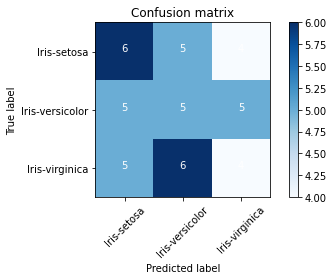

In [55]:
# visualise it
cnf_matrix = confusion_matrix(target_test, iris_prediction)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_)

In [ ]:
# evaluate it


#### 3.2.2 Try a k-nearest-neighbor classifier on the problem. Does it perform better?

In [56]:
# learn KNN classifiers for different values of K and compare their accuracy
knn.fit(iris_preprocessed, iris_target)

KNeighborsClassifier(n_neighbors=3)

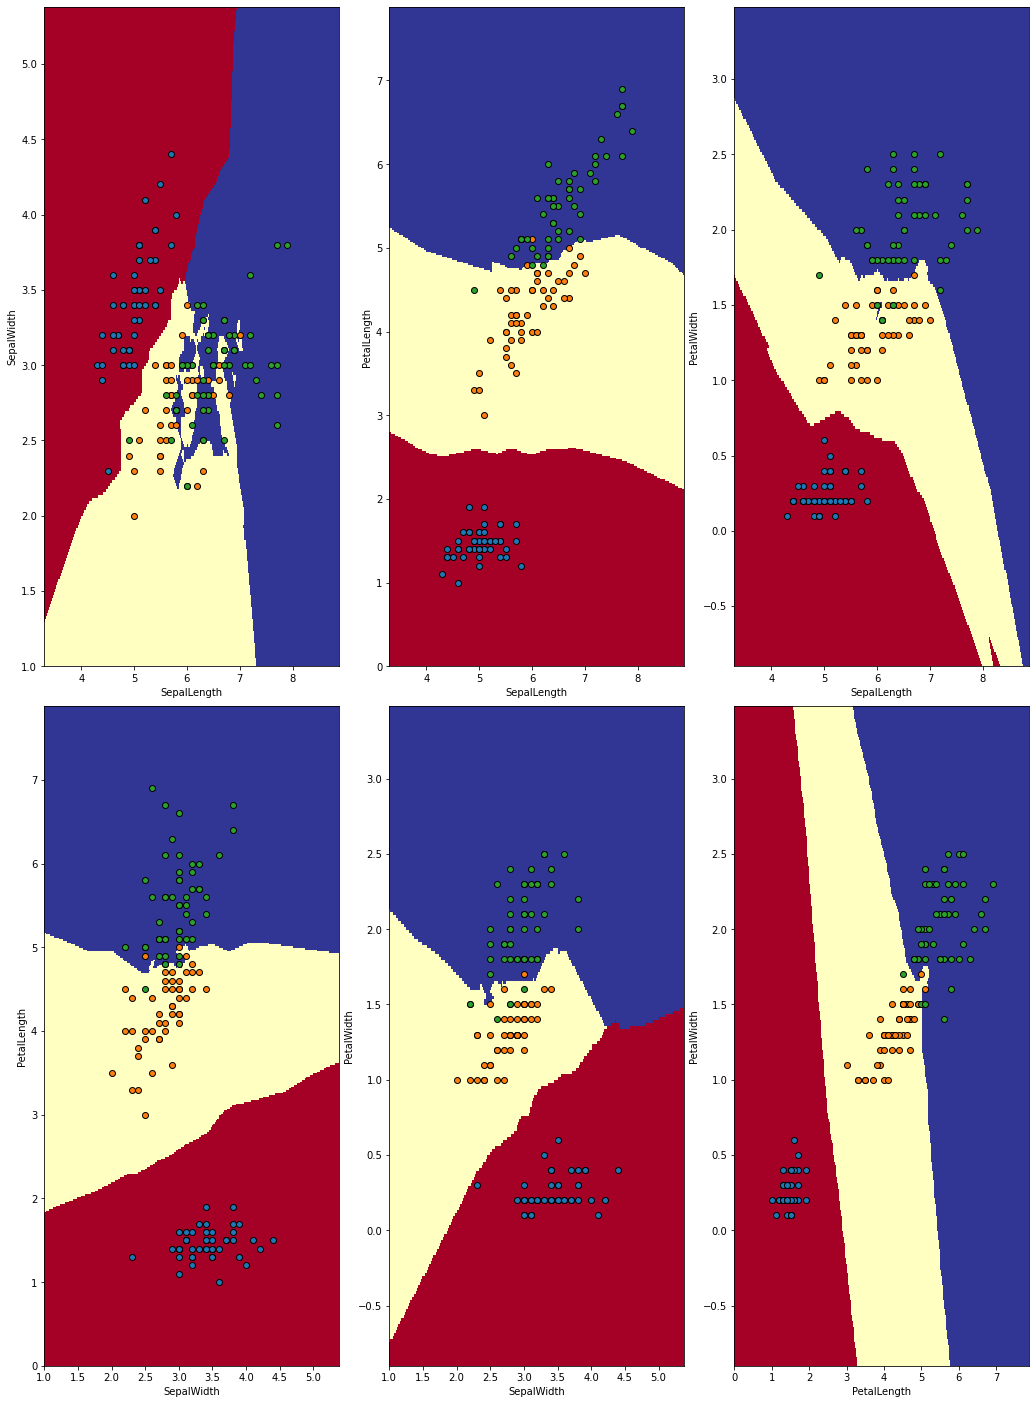

In [57]:
plot_decision_boundary(iris_preprocessed, iris_target, KNeighborsClassifier(3))

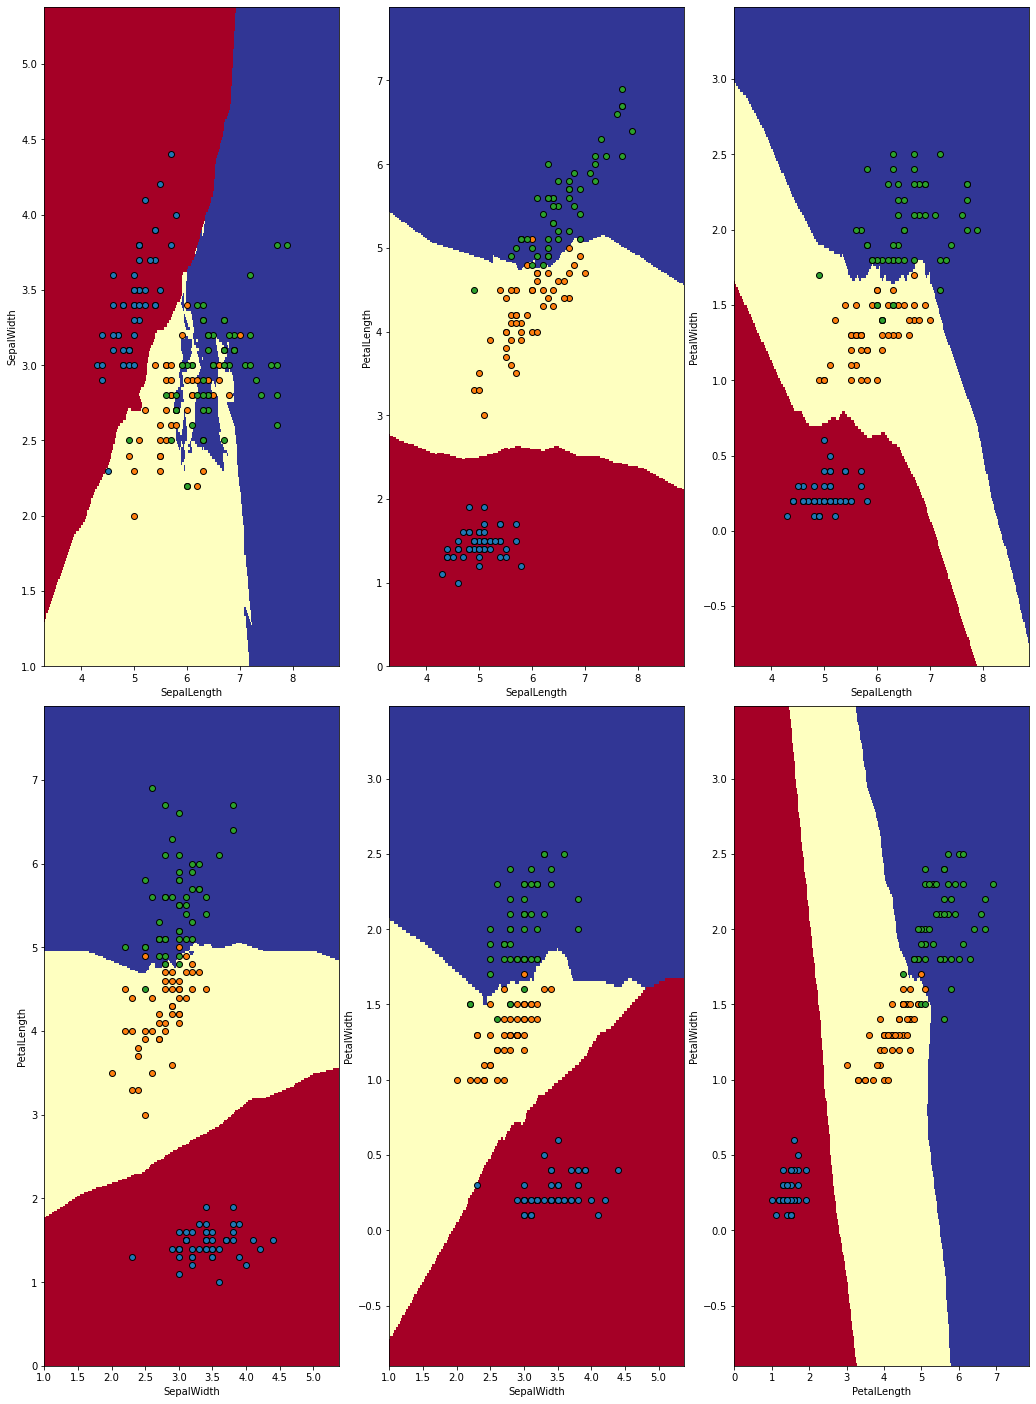

In [58]:
plot_decision_boundary(iris_preprocessed, iris_target, KNeighborsClassifier(5))

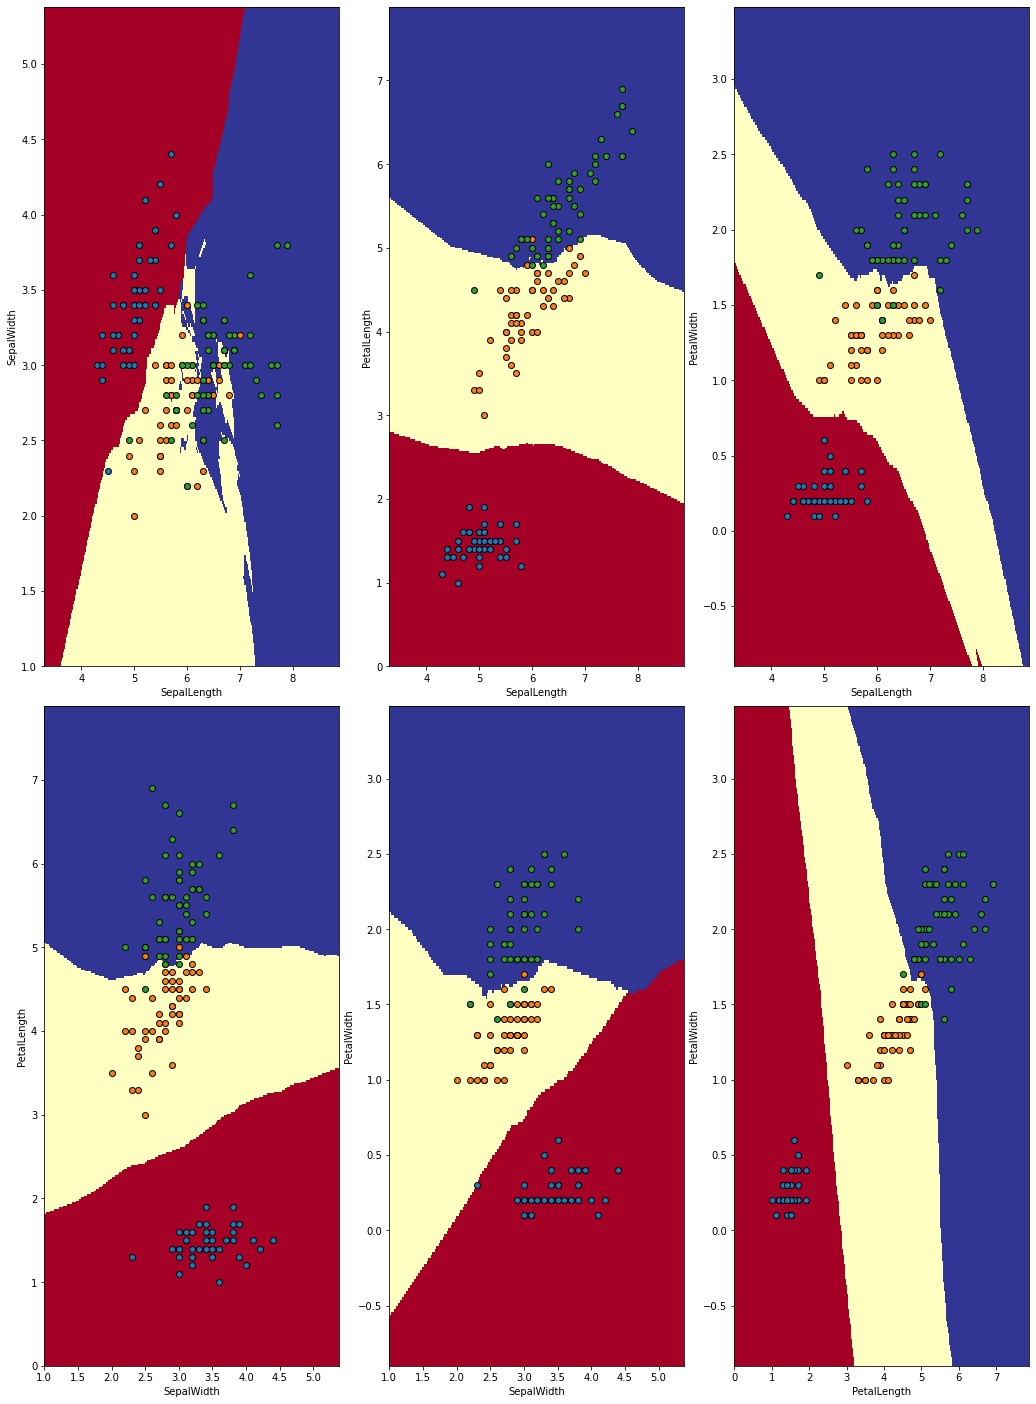

In [59]:
plot_decision_boundary(iris_preprocessed, iris_target, KNeighborsClassifier(7))

### 3.3 More Classification
#### 3.3.1 Compare kNN and Decision Tree using the “Weighting” dataset.

In [88]:
# load the weighting dataset 
weight = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KNN+DecisionTree/weighting.csv')
weight.head()

,weighting.dat (1),weighting.dat (2),weighting.dat (3),weighting.dat (4),weighting.dat (5),weighting.dat (6),weighting.dat (7)
0,2.522084,9.912066,5.473721,9.708924,3.055777,3.379995,negative
1,7.858883,7.722865,6.137092,5.414700,4.316394,5.141432,positive
2,0.116719,5.276446,0.900902,6.577496,4.379008,2.075299,negative
3,1.913008,7.986334,3.786095,8.899318,0.909737,6.283413,negative
4,4.923303,2.889413,9.938024,2.145686,2.630900,7.894478,negative


In [89]:
weight_preprocessed = weight.copy()

# create a variable with the values of the target variable
weight_target = weight['weighting.dat (7)']

# and remove it from the dataframe so it only contains the features that our model should use
#weight_preprocessed = weight.drop(columns='weighting.dat (7)')

# encode the target variable into a numeric value
label_encoder = preprocessing.LabelEncoder()
weight_target = label_encoder.fit_transform(weight_target)

# encode the Outlook and Wind features
encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(weight_preprocessed[['weighting.dat (7)']]).toarray(), columns=encoder.get_feature_names_out(['weighting.dat (7)']))

weight_preprocessed = weight_preprocessed.drop(columns=['weighting.dat (7)'])
weight_preprocessed = weight_preprocessed.join(encoded)

weight_preprocessed

,weighting.dat (1),weighting.dat (2),weighting.dat (3),weighting.dat (4),weighting.dat (5),weighting.dat (6),weighting.dat (7)_negative,weighting.dat (7)_positive
0,2.522084,9.912066,5.473721,9.708924,3.055777,3.379995,1.0,0.0
1,7.858883,7.722865,6.137092,5.414700,4.316394,5.141432,0.0,1.0
2,0.116719,5.276446,0.900902,6.577496,4.379008,2.075299,1.0,0.0
3,1.913008,7.986334,3.786095,8.899318,0.909737,6.283413,1.0,0.0
4,4.923303,2.889413,9.938024,2.145686,2.630900,7.894478,1.0,0.0
...,...,...,...,...,...,...,...,...
495,2.119158,9.714991,8.311271,7.453511,0.269682,5.609750,1.0,0.0
496,6.329252,1.281255,3.829784,8.137087,7.125820,8.472132,0.0,1.0
497,9.353127,8.116356,2.771736,2.484054,5.959159,6.803556,0.0,1.0
498,9.111765,4.251960,5.900663,5.651621,5.380071,4.745640,0.0,1.0


In [90]:
weight_target

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [91]:
dt.fit(weight_preprocessed, weight_target)

DecisionTreeClassifier()

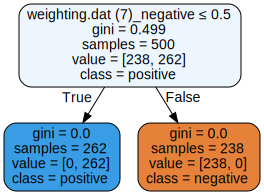

In [94]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=weight_preprocessed.columns, 
                                class_names=label_encoder.classes_,
                               filled=True, rounded=True, special_characters=True) 

graph = graphviz.Source(dot_data) 

display(graph)

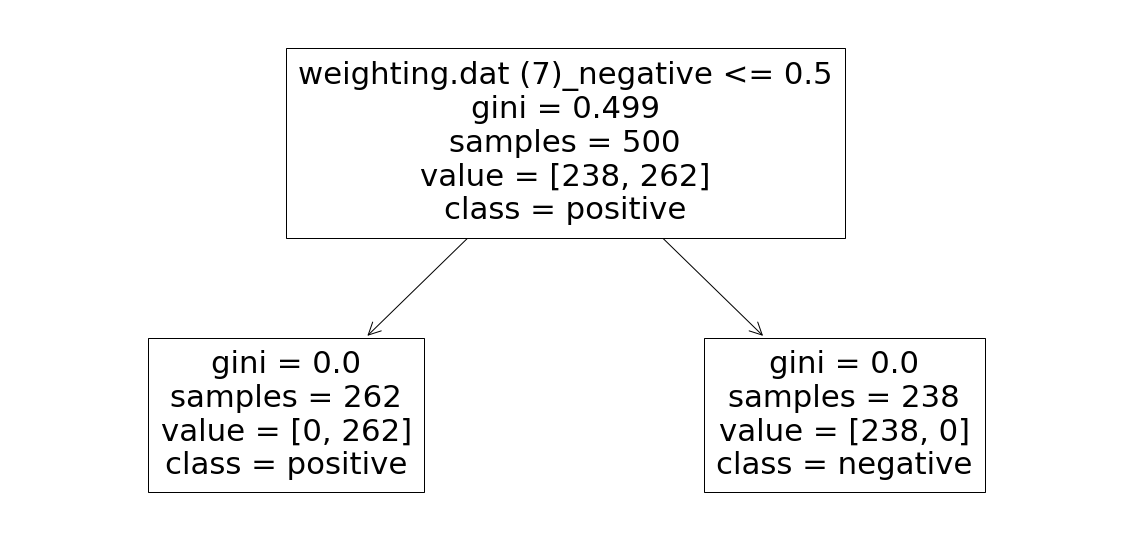

In [95]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt,
               feature_names=weight_preprocessed.columns, 
               class_names=label_encoder.classes_)
plt.show()

In [96]:
# create a train/test split
data_train, data_test, target_train, target_test = train_test_split(
    weight, weight_target,test_size=0.3, random_state=42, stratify=weight_target)

print("=======TRAIN=========")
display(data_train)
display(target_train)

=======TRAIN=========


,weighting.dat (1),weighting.dat (2),weighting.dat (3),weighting.dat (4),weighting.dat (5),weighting.dat (6),weighting.dat (7)
313,8.203539,5.191457,0.102945,0.078921,8.132185,7.132460,positive
243,6.634033,3.148520,2.088502,8.165738,5.575713,3.766468,positive
189,3.897666,9.420309,8.160125,4.037392,5.973884,0.217577,negative
229,3.901110,4.451563,6.481633,7.885634,8.734140,5.849632,negative
139,2.771244,1.624280,6.947840,1.044261,4.414649,9.140524,negative
...,...,...,...,...,...,...,...
132,5.489553,5.082968,7.486779,4.532064,8.843196,1.634276,negative
408,9.132535,9.174867,3.424440,8.679164,2.808344,1.786285,positive
362,9.070367,1.780086,1.915459,7.035631,1.227874,4.083221,positive
274,0.777544,7.335460,5.791635,6.793243,2.891484,6.222444,negative


array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [97]:
print("=======TEST=========")
display(data_test)
display(target_test)

=======TEST=========


,weighting.dat (1),weighting.dat (2),weighting.dat (3),weighting.dat (4),weighting.dat (5),weighting.dat (6),weighting.dat (7)
430,2.311527,6.529565,6.309533,9.630913,3.456787,9.687961,negative
453,7.901592,5.843202,2.635418,3.858247,9.593192,1.131686,positive
98,1.728022,7.650894,2.483574,8.740843,0.005148,2.983427,negative
427,4.820846,2.773596,1.485215,0.756531,2.473905,7.497782,positive
166,2.521215,0.350984,5.398341,7.674143,1.280101,9.119944,negative
...,...,...,...,...,...,...,...
111,4.664550,4.981239,1.991192,4.167617,9.414778,9.828895,positive
155,3.024572,6.948247,5.817020,8.312356,6.522579,2.865378,negative
325,0.256649,4.079635,6.793718,4.475994,9.910861,8.299522,negative
92,4.328643,7.983084,3.349311,5.737400,0.627951,5.423468,negative


array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [98]:
# learn KNN classifiers for different values of K and compare them to a decision tree classifier
knn = KNeighborsClassifier(3)
knn.fit(weight_preprocessed, weight_target)

KNeighborsClassifier(n_neighbors=3)

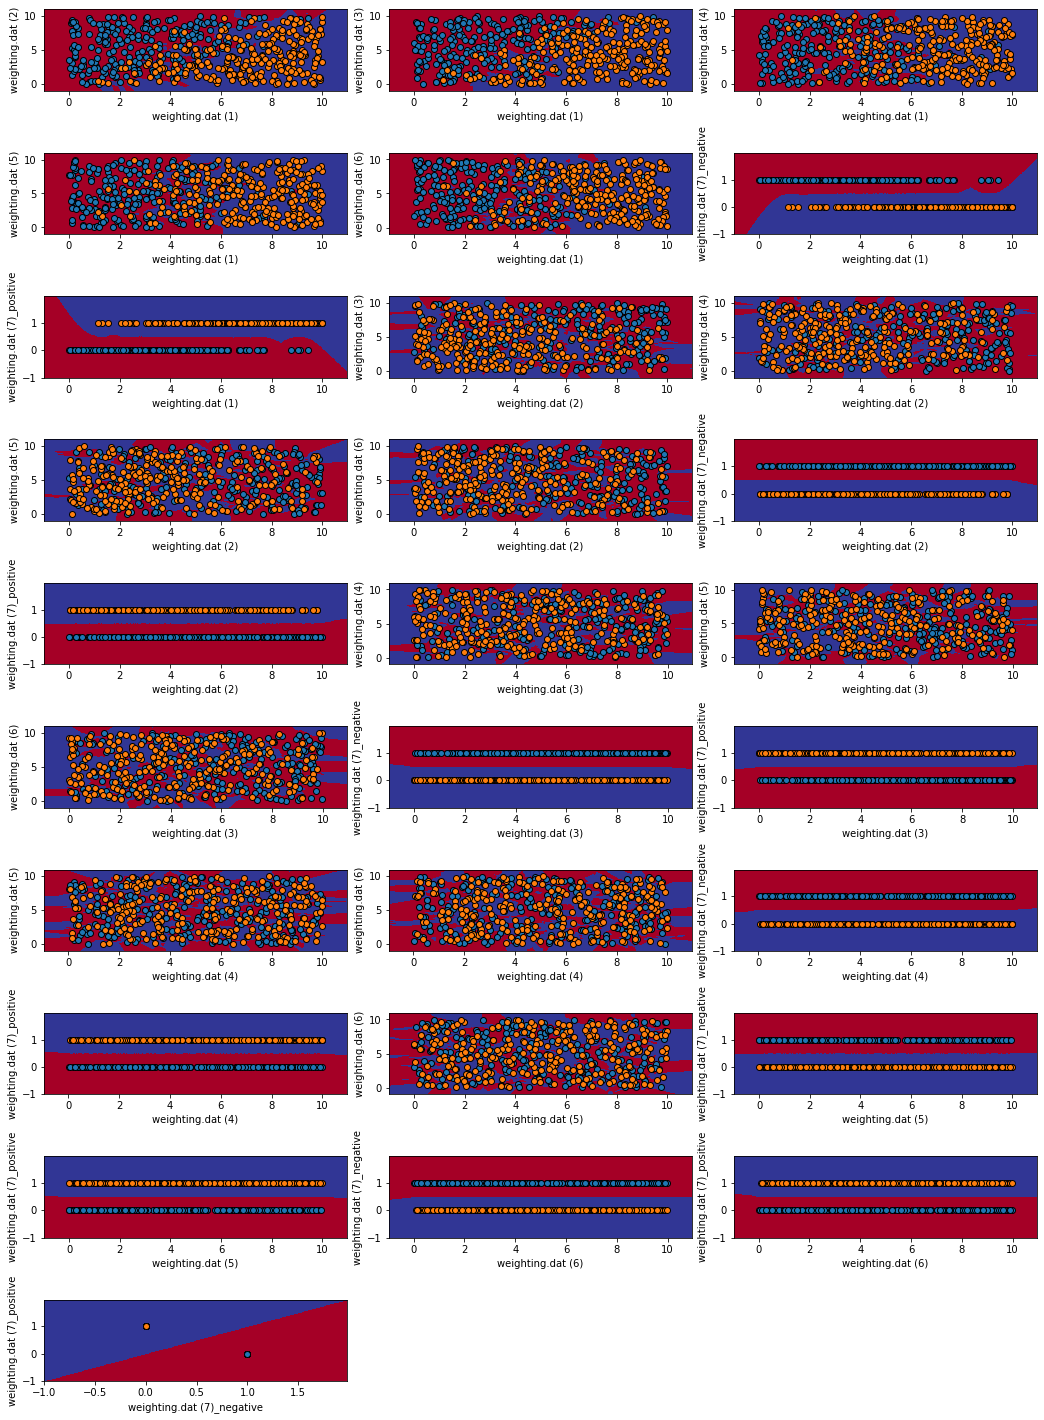

In [99]:
plot_decision_boundary(weight_preprocessed, weight_target, KNeighborsClassifier(3))

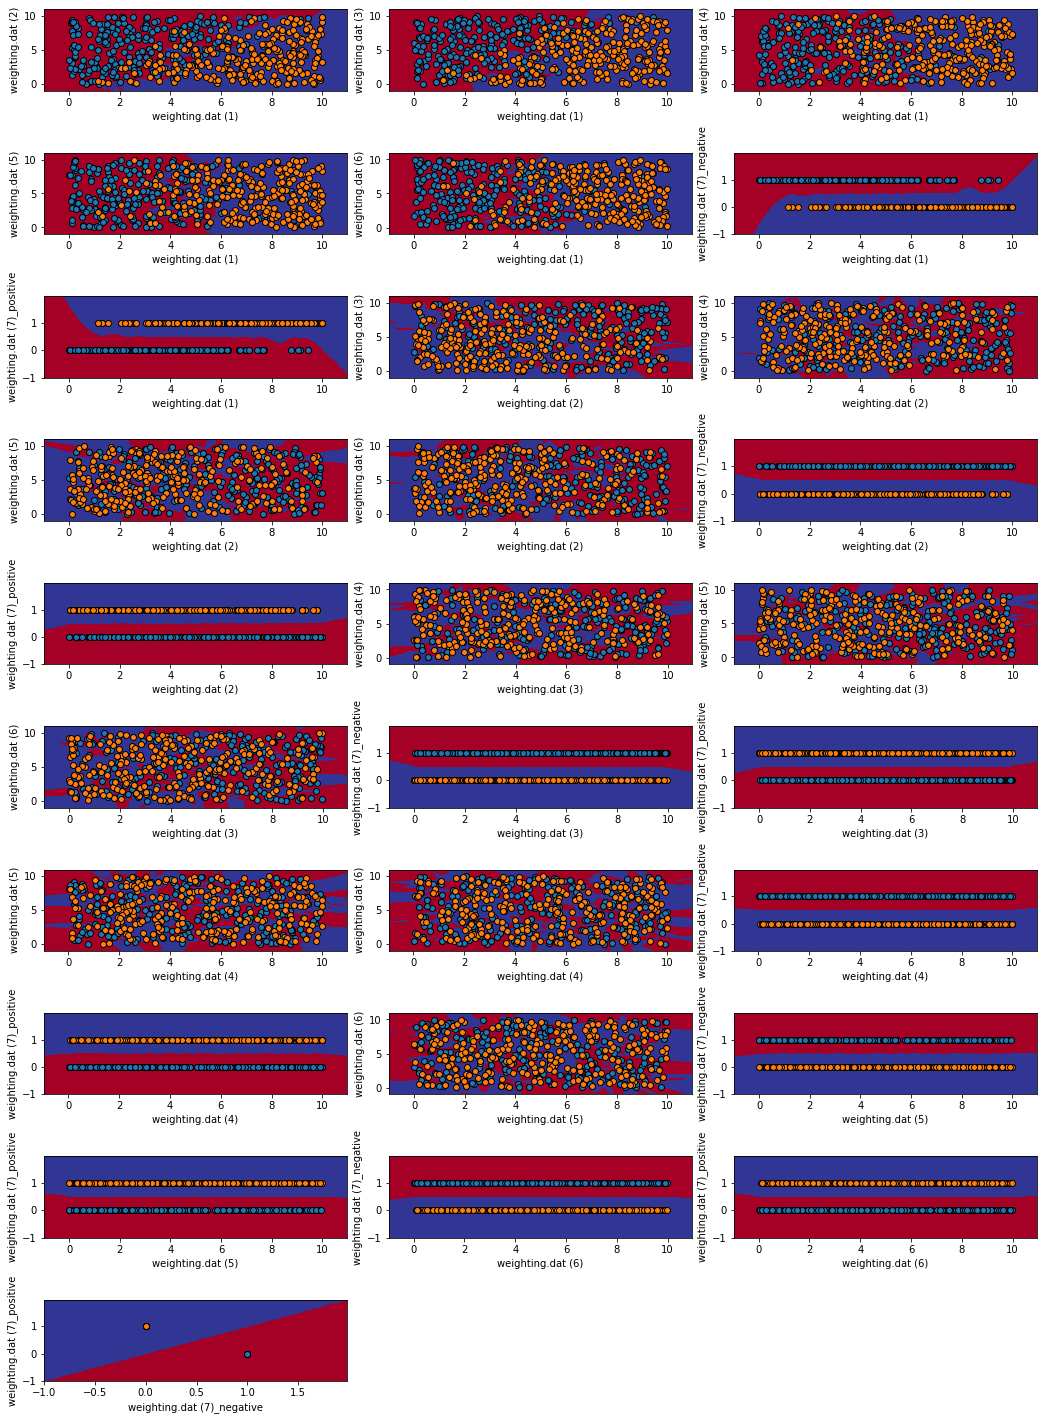

In [100]:
plot_decision_boundary(weight_preprocessed, weight_target, KNeighborsClassifier(5))

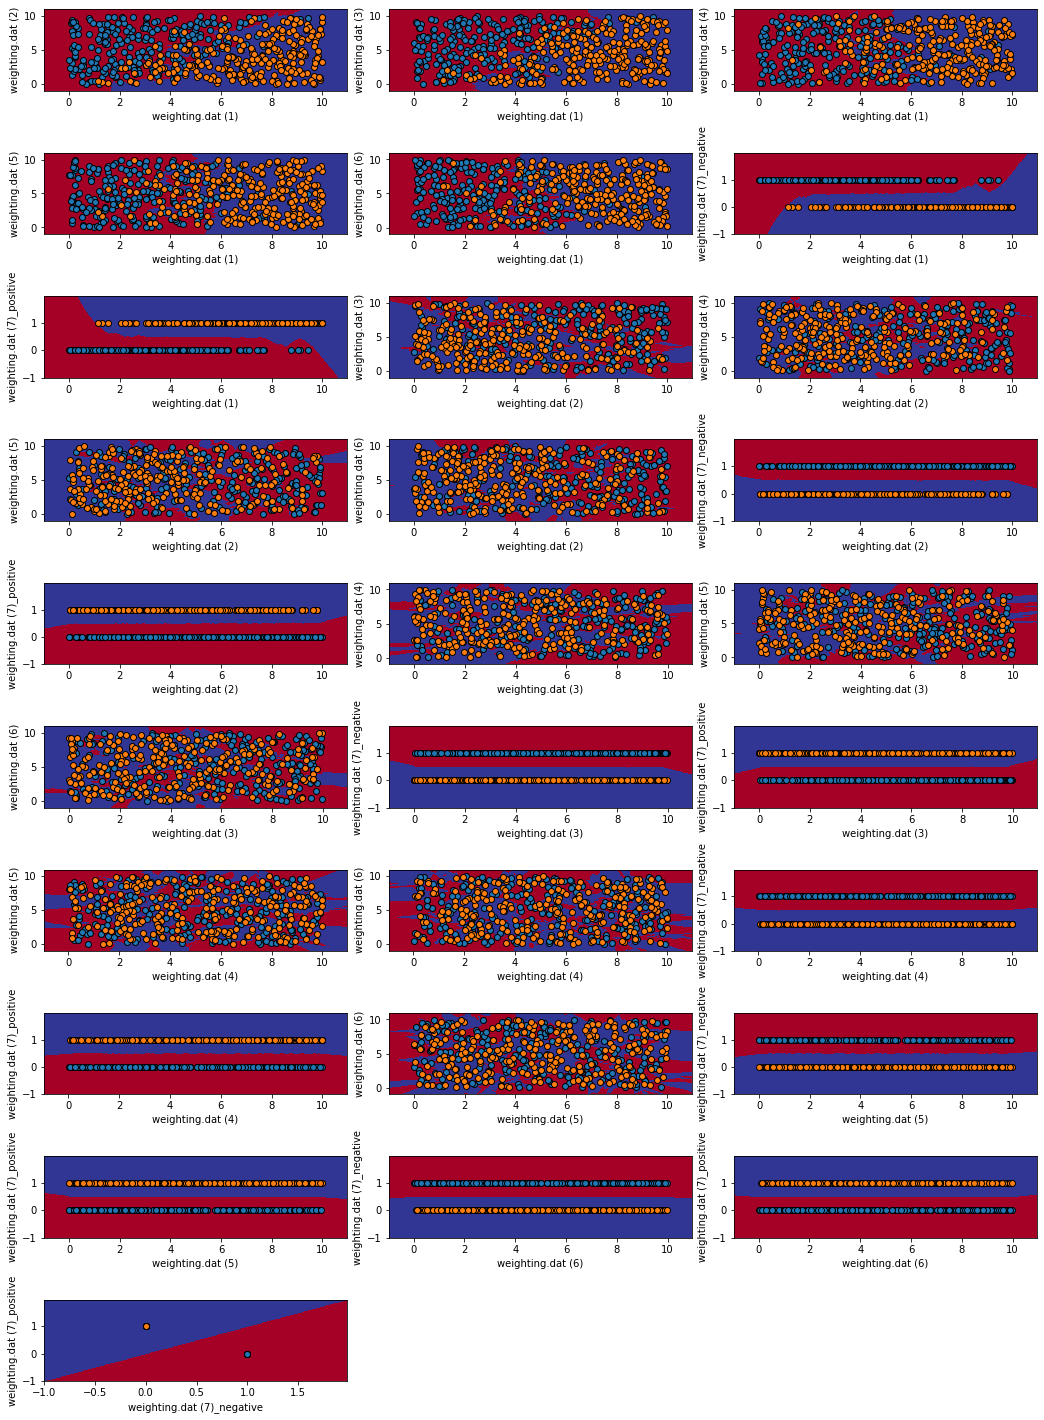

In [101]:
plot_decision_boundary(weight_preprocessed, weight_target, KNeighborsClassifier(7))